In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
train_df = pd.read_csv('../datasets/train.csv')
'''Removing the 'id' column is a common preprocessing step in machine learning workflows.
id's do not carry predictive information and could interfere with model training if left in the dataset.
 By dropping this column from both training and test sets, you ensure that only relevant features are used for modeling'''
train_df.drop('id',inplace=True,axis=1)
print('Columns:', list(train_df.columns))
print('Info:')
train_df.info()
train_df.head()

Columns: ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:
# check pseudonull values and uniqueness faults
print("\nUnique values in each column (nan is not a value):")
for col in train_df.columns:
    print(f"{col}: {train_df[col].nunique()} unique values")
    if col != "id":
        try:
            unique_vals = train_df[col].unique()
            # Convert to string to handle mixed types, then sort
            unique_vals_str = [str(val) for val in unique_vals]
            print(f"  Values: {sorted(unique_vals_str)}")
        except Exception as e:
            print(f"  Values: {list(train_df[col].unique())}")
    print()


Unique values in each column (nan is not a value):
brand: 57 unique values
  Values: ['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai', 'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'MINI', 'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac', 'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart']

model: 1897 unique values
  Values: ['124 Spider Abarth', '128 i', '135 i', '135 is', '1500 Big Horn', '1500 Cheyenne', '1500 Cheyenne Extended Cab', '1500 Classic SLT', '1500 Classic Tradesman', '1500 Classic Warlock', '1500 Laramie', '1500 Limited', '1500 Longhorn', '1500 Rebel', '1500 SLT', '1500 Sport', '1500 TRX', '1500 Trades

"brand" column has no pseudonull values and unique values are OK
"model" column has no pseudonull values and unique values are OK
"model_year" column has no pseudonull values and unique values are OK
"mileage" column has no pseudonull values and unique values are OK
"fuel_type" column has pseudonull values "-"
"engine" column has pseudonull values "-"
"transmission" column has pseudonull values "-"
"ext_col" column has pseudonull values "-"
"int_col" column has pseudonull values "-"
"accident" column has no pseudonull values and unique values are OK
"clean_title" column has no pseudonull values and unique values are OK
"price" column has no pseudonull values and unique values are OK

In [4]:
# replace "-" values by nan
df_clean = train_df.copy()
missing_values = ['-', '—', '–', '−']
df_clean = df_clean.replace(missing_values, np.nan)
print('Info after replacing "-" by nan:')
df_clean.info()

Info after replacing "-" by nan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     182669 non-null  object
 5   engine        187608 non-null  object
 6   transmission  188446 non-null  object
 7   ext_col       188167 non-null  object
 8   int_col       184006 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


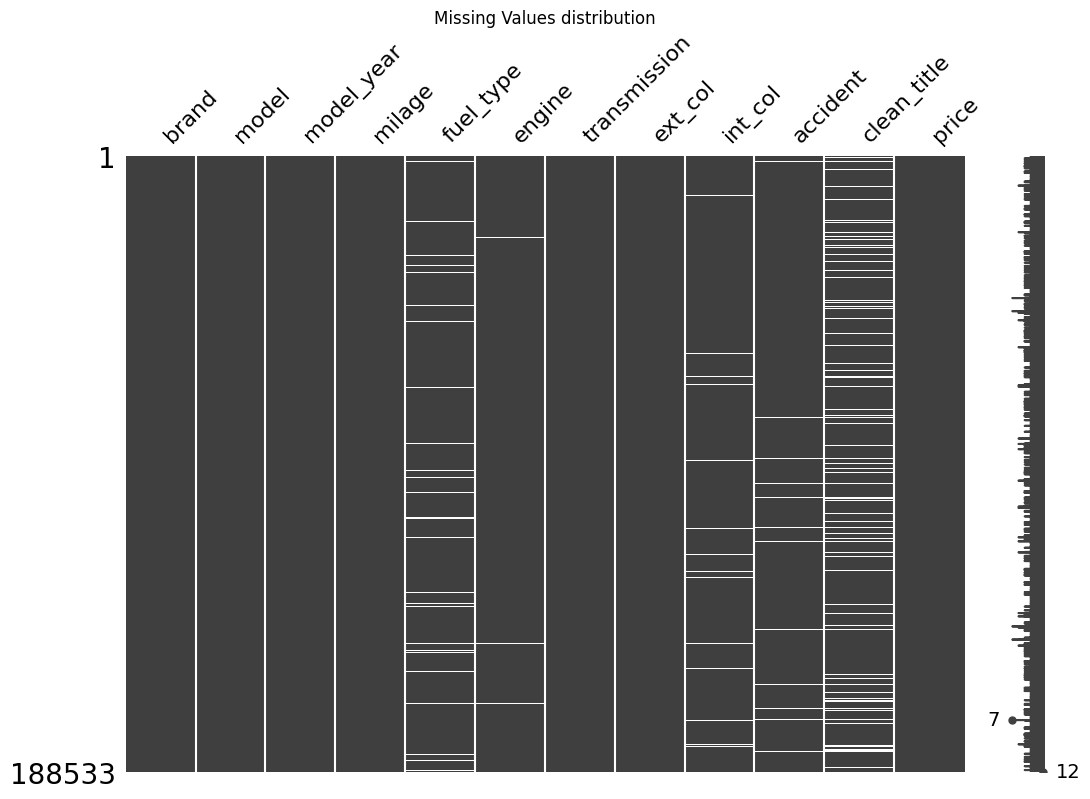

In [5]:
msno.matrix(df_clean, figsize=(12, 8))
plt.title('Missing Values distribution')
plt.show()

In [6]:
#check for duplicate rows
duplicates = df_clean[df_clean.duplicated(keep=False)]#df_clean.duplicated(keep=False) returns a boolean Series indicating if a row is duplicated in the  DataFrame
duplicates.shape

(0, 12)

There are no duplicate rows in our dataset

In [7]:
# delete any row with nan value
df_clean.dropna(inplace=True)
# Remove price outliers above 100000
df_clean = df_clean[df_clean['price'] <= 100000]
print('Info after deleting nan rows and price outliers')
df_clean.info()

Info after deleting nan rows and price outliers
<class 'pandas.core.frame.DataFrame'>
Index: 150711 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         150711 non-null  object
 1   model         150711 non-null  object
 2   model_year    150711 non-null  int64 
 3   milage        150711 non-null  int64 
 4   fuel_type     150711 non-null  object
 5   engine        150711 non-null  object
 6   transmission  150711 non-null  object
 7   ext_col       150711 non-null  object
 8   int_col       150711 non-null  object
 9   accident      150711 non-null  object
 10  clean_title   150711 non-null  object
 11  price         150711 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 14.9+ MB


In [8]:
from datetime import datetime

def feature_engineering(df_clean):
    current_year = datetime.now().year

    df_clean['age'] = current_year - df_clean['model_year']
    df_clean['milage_per_year'] = df_clean['milage']/df_clean['age']

    def extract_horsepower(engine):
        try:
            return float(engine.split('HP')[0])
        except:
            return None

    def extract_engine_size(engine):
        try:
            return float(engine.split(' ')[1].replace('L', ''))
        except:
            return None

    df_clean['horsepower'] = df_clean['engine'].apply(extract_horsepower)# when splitting fails nan values are assigned
    df_clean['engine_size'] = df_clean['engine'].apply(extract_engine_size)
    df_clean['power_to_weight_ratio'] = df_clean['horsepower']/df_clean['engine_size']

    luxury_brands =  ['Mercedes-Benz', 'BMW', 'Audi', 'Porsche', 'Land', 
                    'Lexus', 'Jaguar', 'Bentley', 'Maserati', 'Lamborghini', 
                    'Rolls-Royce', 'Ferrari', 'McLaren', 'Aston', 'Maybach']
    df_clean['Is_Luxury_Brand'] = df_clean['brand'].apply(lambda x: 1 if x in luxury_brands else 0)

    df_clean['Accident_Impact'] = df_clean.apply(lambda x: 1 if x['accident'] == 1 and x['clean_title'] == 0 else 0, axis=1)
    # Nan values are generated throug feature enginereeing. Drop rows with any NaN values after feature extraction
    df_clean = df_clean.dropna()
    return df_clean


In [9]:
df_clean = feature_engineering(df_clean)
print("\nNaNs in df_clean after feature engineering:", df_clean.isnull().sum())
df_clean.to_csv('../datasets/train_cleaned.csv')


NaNs in df_clean after feature engineering: brand                    0
model                    0
model_year               0
milage                   0
fuel_type                0
engine                   0
transmission             0
ext_col                  0
int_col                  0
accident                 0
clean_title              0
price                    0
age                      0
milage_per_year          0
horsepower               0
engine_size              0
power_to_weight_ratio    0
Is_Luxury_Brand          0
Accident_Impact          0
dtype: int64


## Metrics
Now that we have cleaned our dataset, let´s get its metrics

## Univariate Analysis

Now we'll perform a comprehensive univariate analysis to understand the distribution and characteristics of each variable in our cleaned dataset.



UNIVARIATE ANALYSIS - VISUALIZATIONS


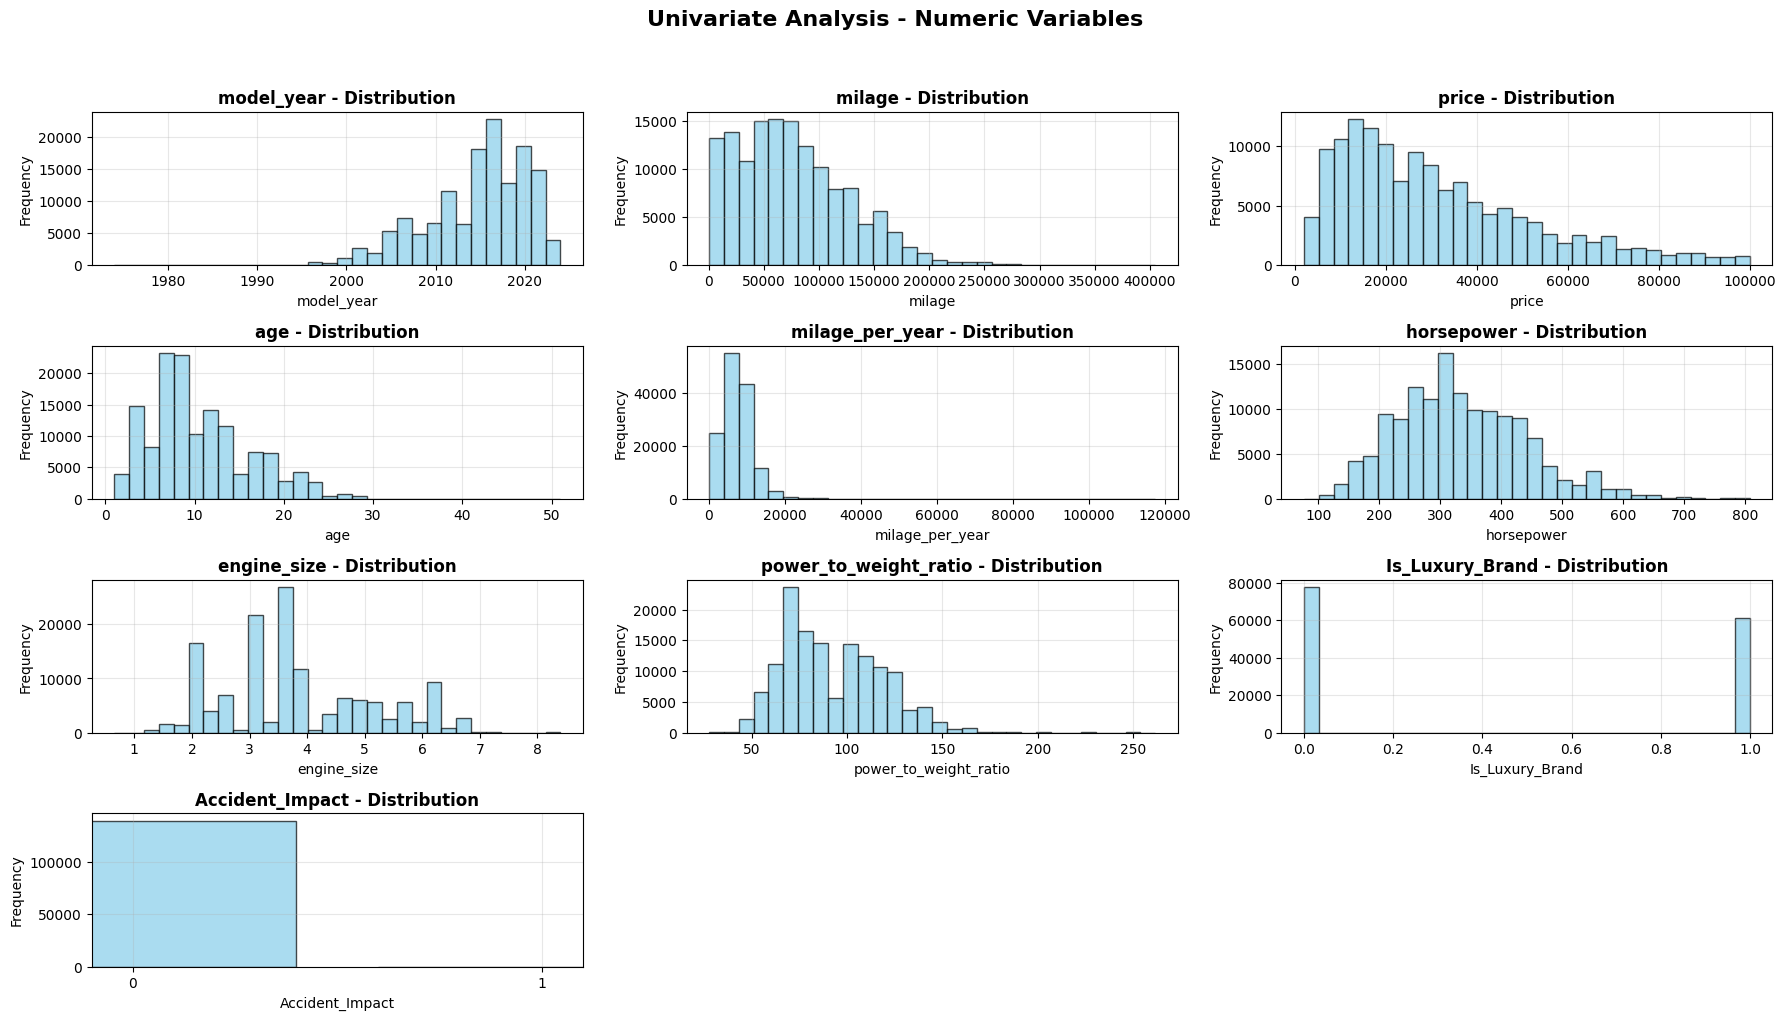

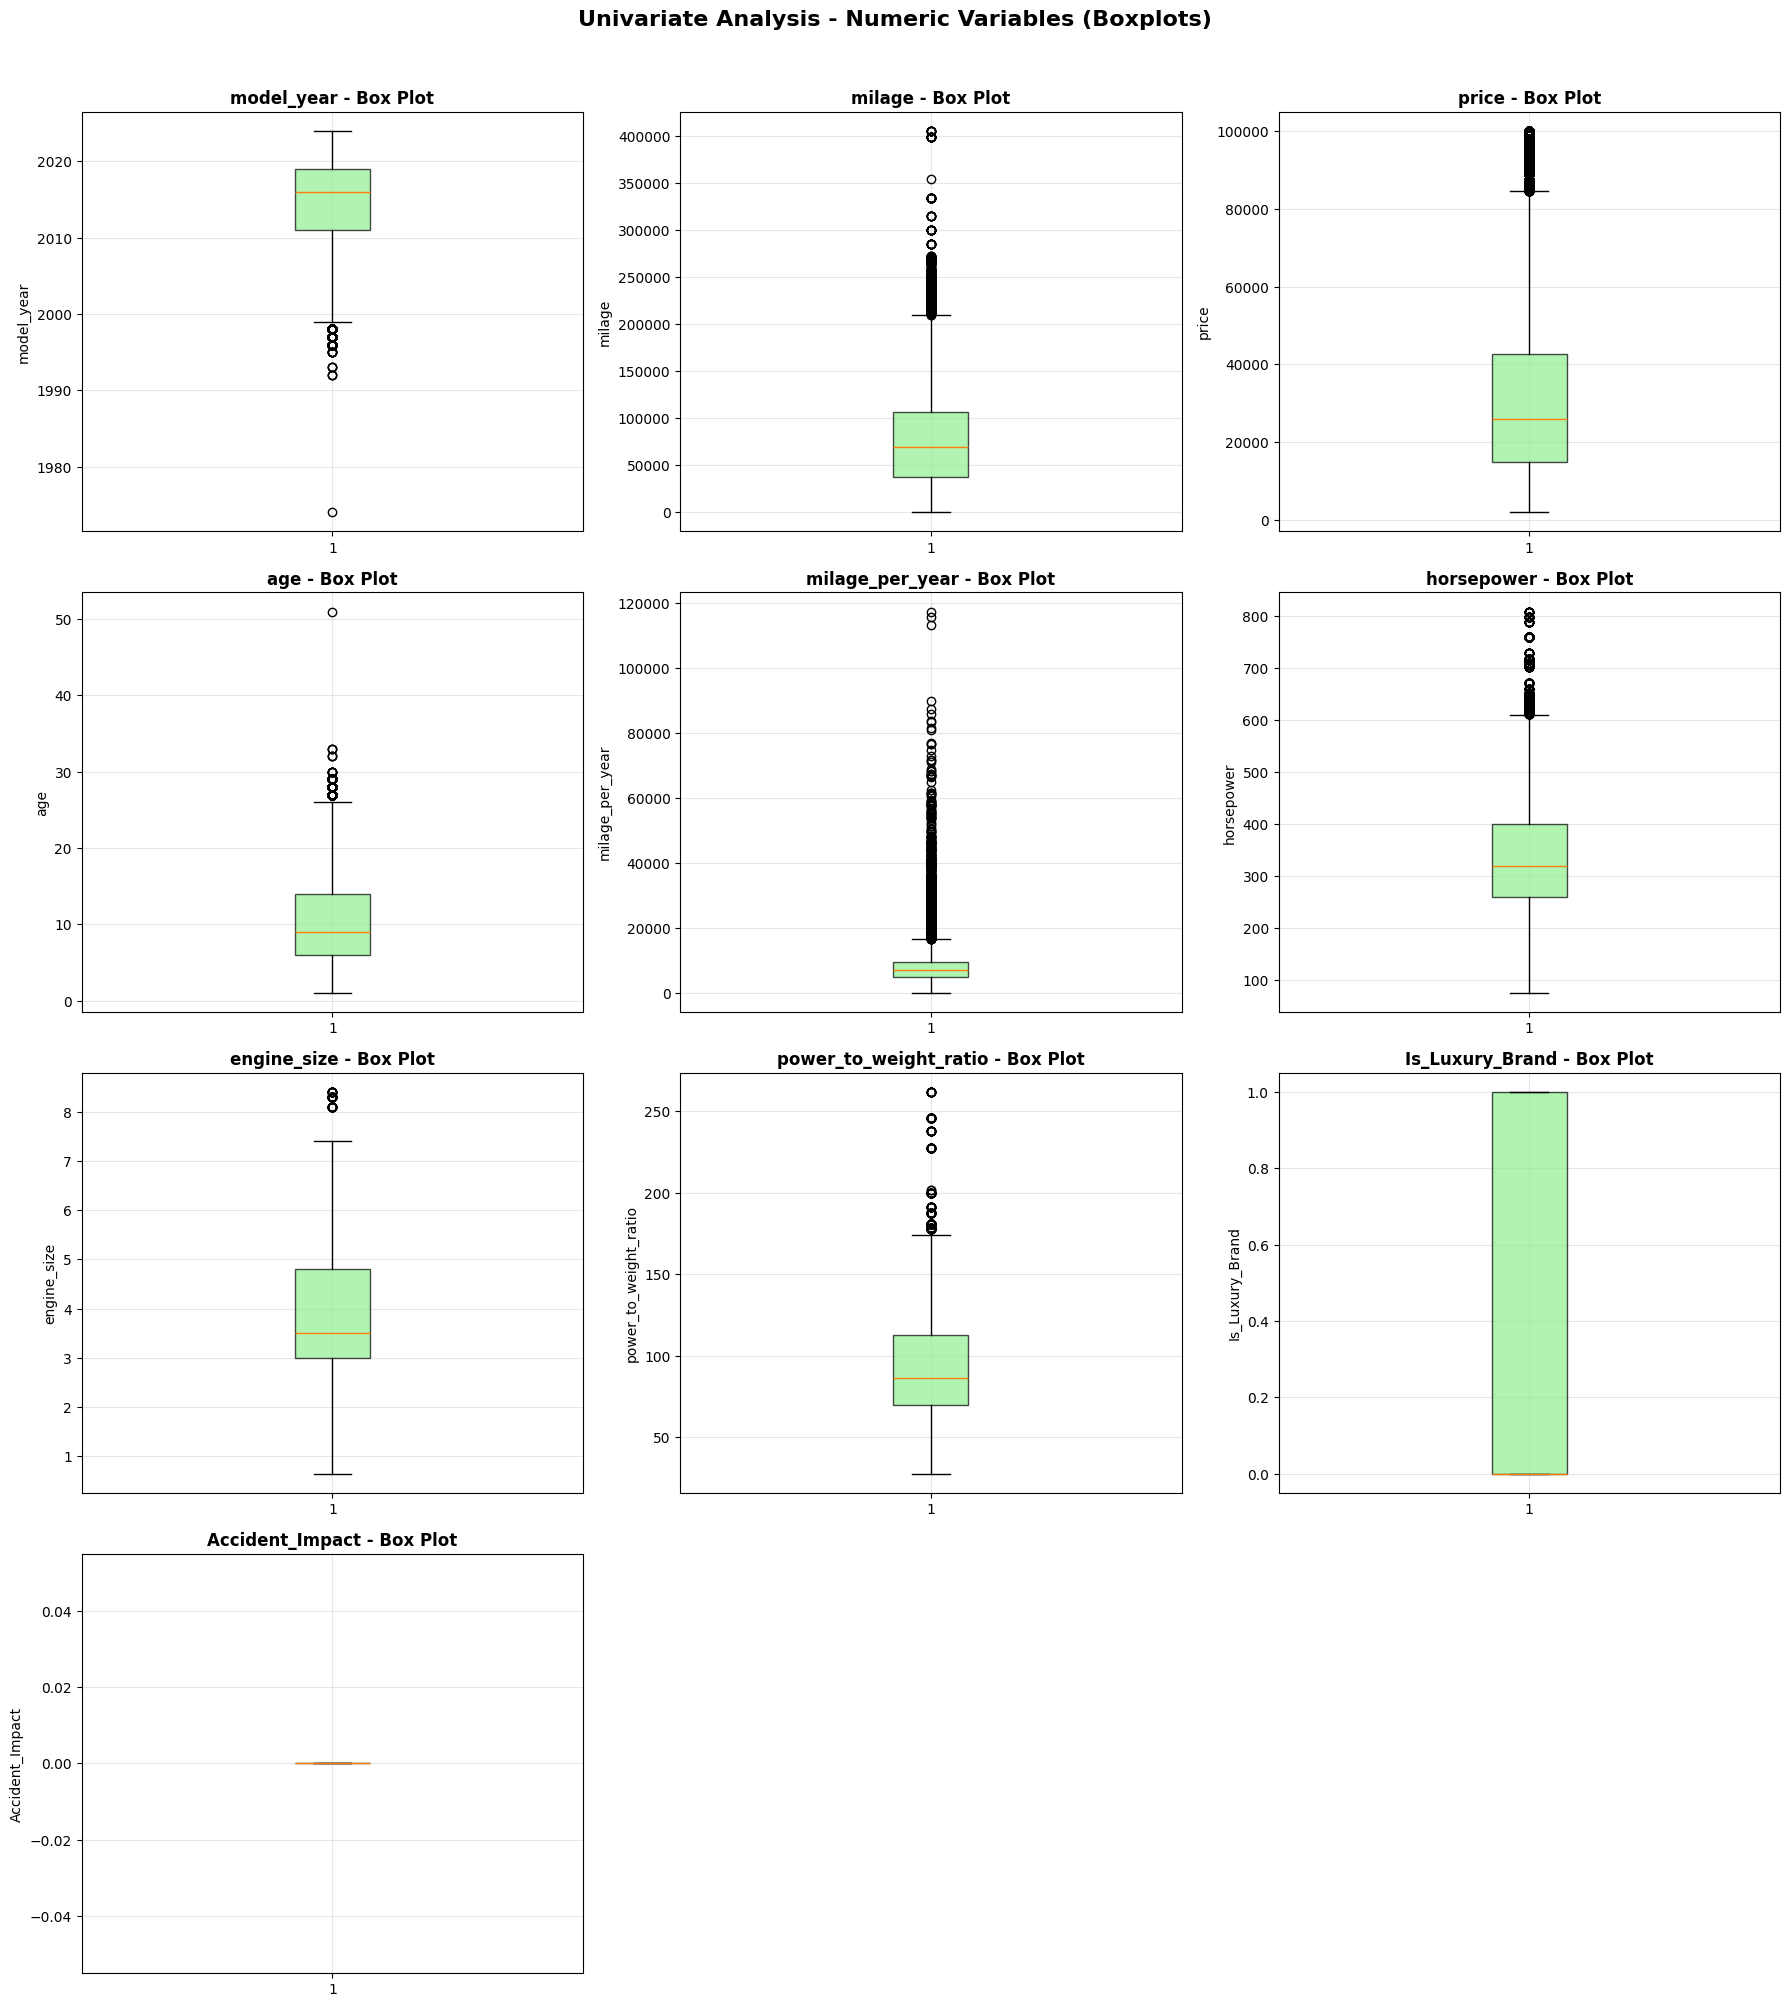

In [10]:
# UNIVARIATE VISUALIZATIONS
print("\n" + "=" * 60)
print("UNIVARIATE ANALYSIS - VISUALIZATIONS")
print("=" * 60)

# Set up the plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 30)  # taller for 12 plots

# 1. NUMERIC VARIABLES PLOTS
numeric_columns = df_clean.select_dtypes(include=['number']).columns
n_cols = 3
n_rows = 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 30))
fig.suptitle('Univariate Analysis - Numeric Variables', fontsize=16, fontweight='bold')

for idx, col in enumerate(numeric_columns):
    row = idx // n_cols
    col_idx = idx % n_cols
    # Histogram in the upper half of each cell
    if col == 'Accident_Impact':
        axes[row, col_idx].hist(df_clean[col].dropna(), bins=[-0.5,0.5,1.5], alpha=0.7, color='skyblue', edgecolor='black', rwidth=0.8)
        axes[row, col_idx].set_xlim(-0.1, 1.1)
        axes[row, col_idx].set_xticks([0, 1])
    else:
        axes[row, col_idx].hist(df_clean[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col_idx].set_title(f'{col} - Distribution', fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(True, alpha=0.3)

# Hide any unused subplots (remove empty histograms)
for idx in range(len(numeric_columns), n_rows * n_cols):
    row = idx // n_cols
    col_idx = idx % n_cols
    fig.delaxes(axes[row, col_idx])

plt.tight_layout(rect=[0, 0.5, 1, 0.97])
plt.show()

# Boxplots for numeric columns
fig2, axes2 = plt.subplots(n_rows, n_cols, figsize=(18, 30))
fig2.suptitle('Univariate Analysis - Numeric Variables (Boxplots)', fontsize=16, fontweight='bold')

for idx, col in enumerate(numeric_columns):
    row = idx // n_cols
    col_idx = idx % n_cols
    axes2[row, col_idx].boxplot(df_clean[col].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha=0.7))
    axes2[row, col_idx].set_title(f'{col} - Box Plot', fontweight='bold')
    axes2[row, col_idx].set_ylabel(col)
    axes2[row, col_idx].grid(True, alpha=0.3)

# Hide any unused subplots in boxplots
for idx in range(len(numeric_columns), n_rows * n_cols):
    row = idx // n_cols
    col_idx = idx % n_cols
    fig2.delaxes(axes2[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

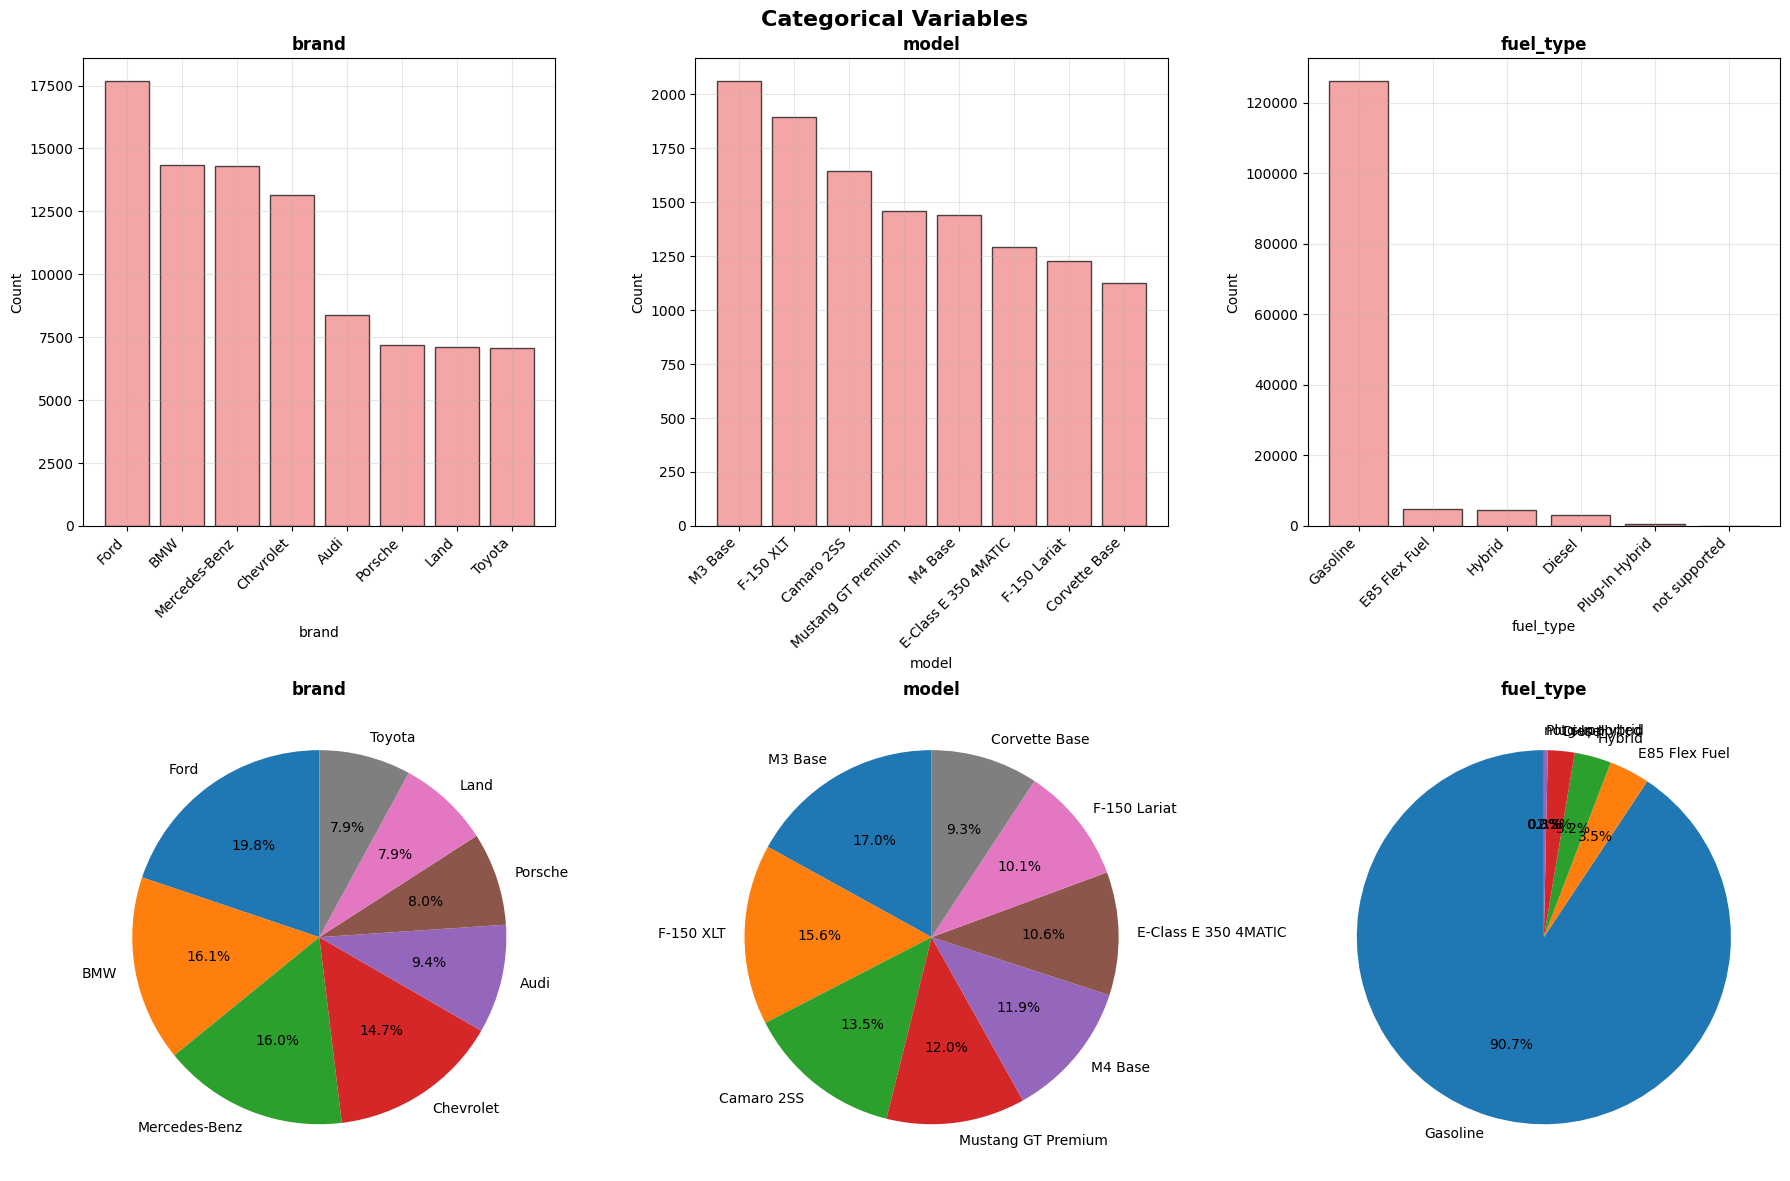

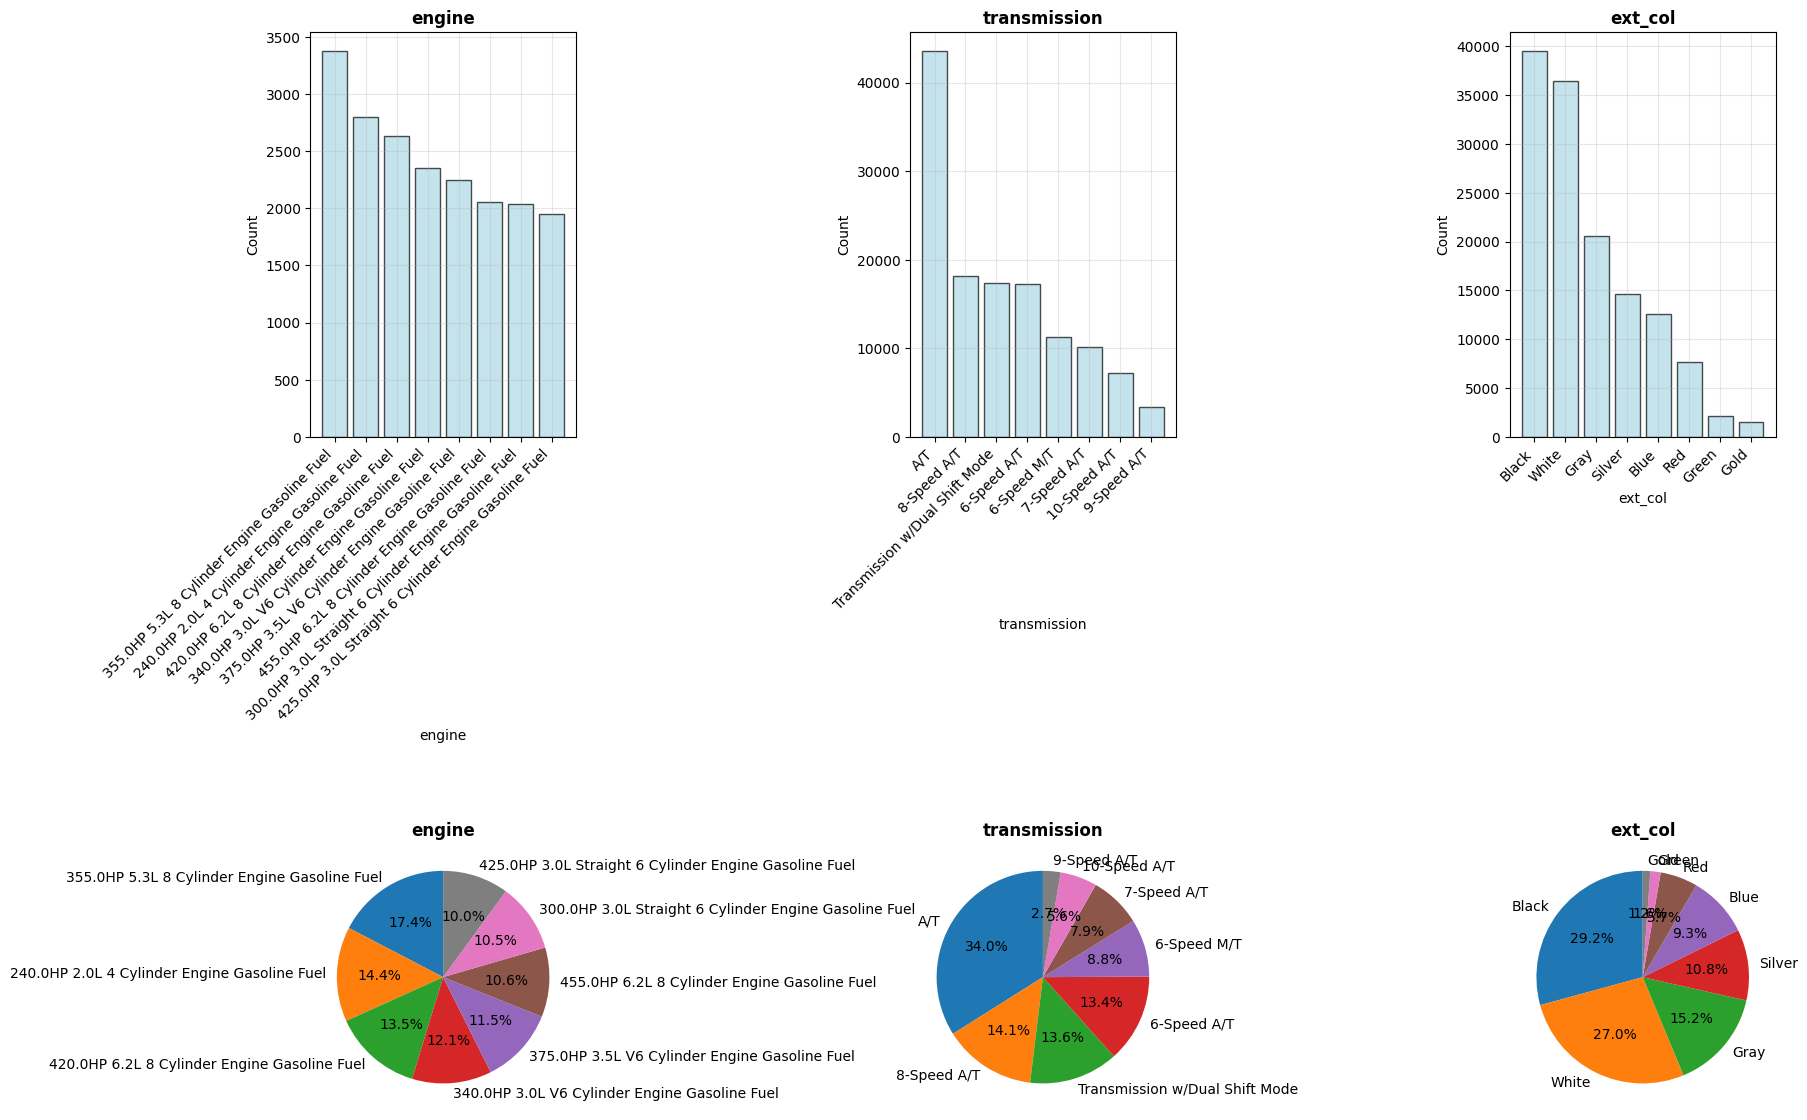

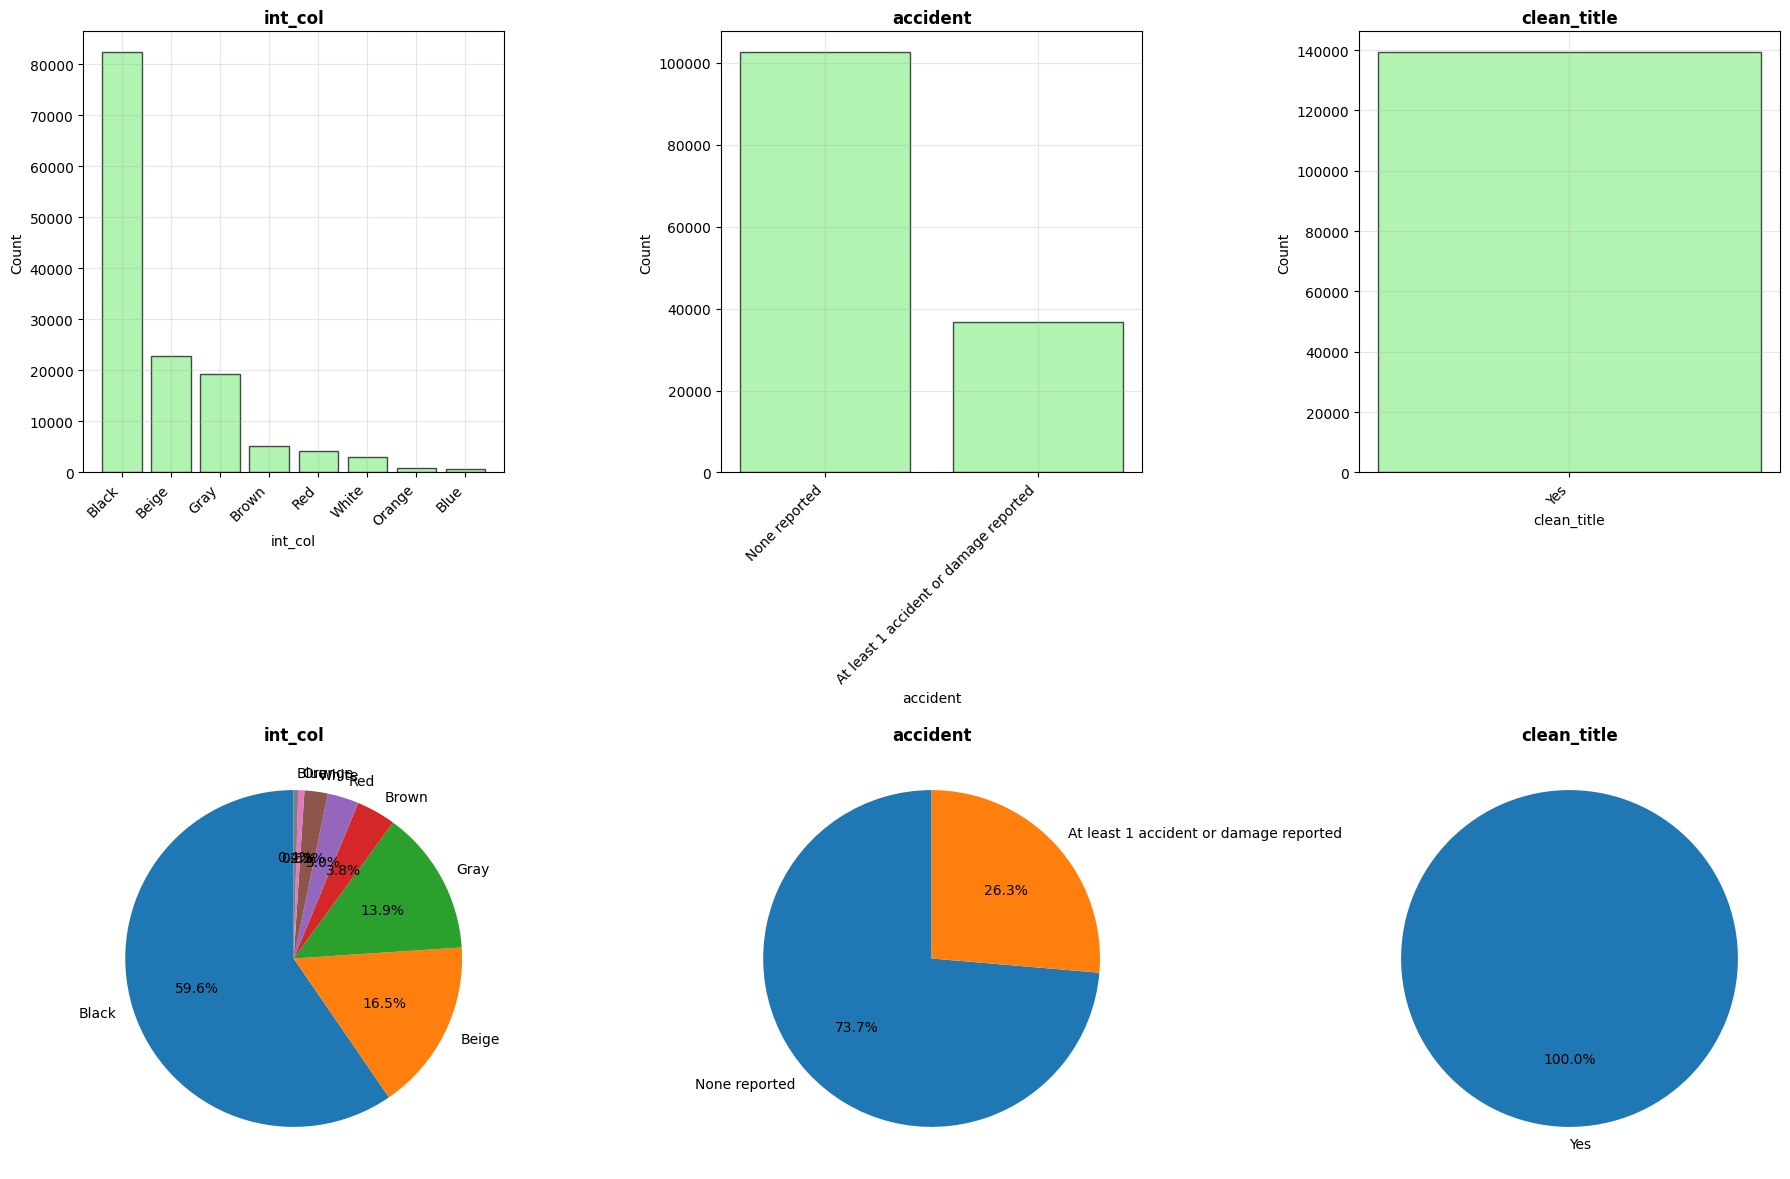

In [11]:
# CATEGORICAL VARIABLES PLOTS
categorical_columns = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

# Split into 3 groups of 3 columns each (6 charts per group)
group1 = categorical_columns[:3]  # First 3 columns: brand, model, fuel_type
group2 = categorical_columns[3:6]  # Next 3 columns: engine, transmission, ext_col
group3 = categorical_columns[6:]  # Last 3 columns: int_col, accident, clean_title

# FIGURE 1: First 3 columns (6 charts)
fig1, axes1 = plt.subplots(2, 3, figsize=(18, 12))
fig1.suptitle('Categorical Variables', fontsize=16, fontweight='bold')

for i, col in enumerate(group1):
    value_counts = df_clean[col].value_counts().head(8)
    
    # Bar chart
    axes1[0, i].bar(range(len(value_counts)), value_counts.values, 
                   color='lightcoral', alpha=0.7, edgecolor='black')
    axes1[0, i].set_title(f'{col}', fontweight='bold')
    axes1[0, i].set_xlabel(col)
    axes1[0, i].set_ylabel('Count')
    axes1[0, i].tick_params(axis='x', rotation=45)
    axes1[0, i].grid(True, alpha=0.3)
    axes1[0, i].set_xticks(range(len(value_counts)))
    axes1[0, i].set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    # Pie chart
    axes1[1, i].pie(value_counts.values, labels=value_counts.index, 
                   autopct='%1.1f%%', startangle=90)
    axes1[1, i].set_title(f'{col}', fontweight='bold')

plt.tight_layout()
plt.show()

# FIGURE 2: Next 3 columns (6 charts)
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 12))
#fig2.suptitle('Categorical Variables - Group 2 (Bar + Pie Charts)', fontsize=16, fontweight='bold')

for i, col in enumerate(group2):
    value_counts = df_clean[col].value_counts().head(8)
    
    # Bar chart
    axes2[0, i].bar(range(len(value_counts)), value_counts.values, 
                   color='lightblue', alpha=0.7, edgecolor='black')
    axes2[0, i].set_title(f'{col}', fontweight='bold')
    axes2[0, i].set_xlabel(col)
    axes2[0, i].set_ylabel('Count')
    axes2[0, i].tick_params(axis='x', rotation=45)
    axes2[0, i].grid(True, alpha=0.3)
    axes2[0, i].set_xticks(range(len(value_counts)))
    axes2[0, i].set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    # Pie chart
    axes2[1, i].pie(value_counts.values, labels=value_counts.index, 
                   autopct='%1.1f%%', startangle=90)
    axes2[1, i].set_title(f'{col}', fontweight='bold')

plt.tight_layout()
plt.show()

# FIGURE 3: Last 3 columns (6 charts)
fig3, axes3 = plt.subplots(2, 3, figsize=(18, 12))
#fig3.suptitle('Categorical Variables - Group 3 (Bar + Pie Charts)', fontsize=16, fontweight='bold')

for i, col in enumerate(group3):
    value_counts = df_clean[col].value_counts().head(8)
    
    # Bar chart
    axes3[0, i].bar(range(len(value_counts)), value_counts.values, 
                   color='lightgreen', alpha=0.7, edgecolor='black')
    axes3[0, i].set_title(f'{col}', fontweight='bold')
    axes3[0, i].set_xlabel(col)
    axes3[0, i].set_ylabel('Count')
    axes3[0, i].tick_params(axis='x', rotation=45)
    axes3[0, i].grid(True, alpha=0.3)
    axes3[0, i].set_xticks(range(len(value_counts)))
    axes3[0, i].set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    # Pie chart
    axes3[1, i].pie(value_counts.values, labels=value_counts.index, 
                   autopct='%1.1f%%', startangle=90)
    axes3[1, i].set_title(f'{col}', fontweight='bold')

plt.tight_layout()
plt.show()


## Correlation Matrix

c:\Users\raquel\Desktop\ai-project-Regression_equipo4\.venv\Lib\site-packages\dython\__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution
c:\Users\raquel\Desktop\ai-project-Regression_equipo4\.venv\Lib\site-packages\dython\nominal.py:321: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(


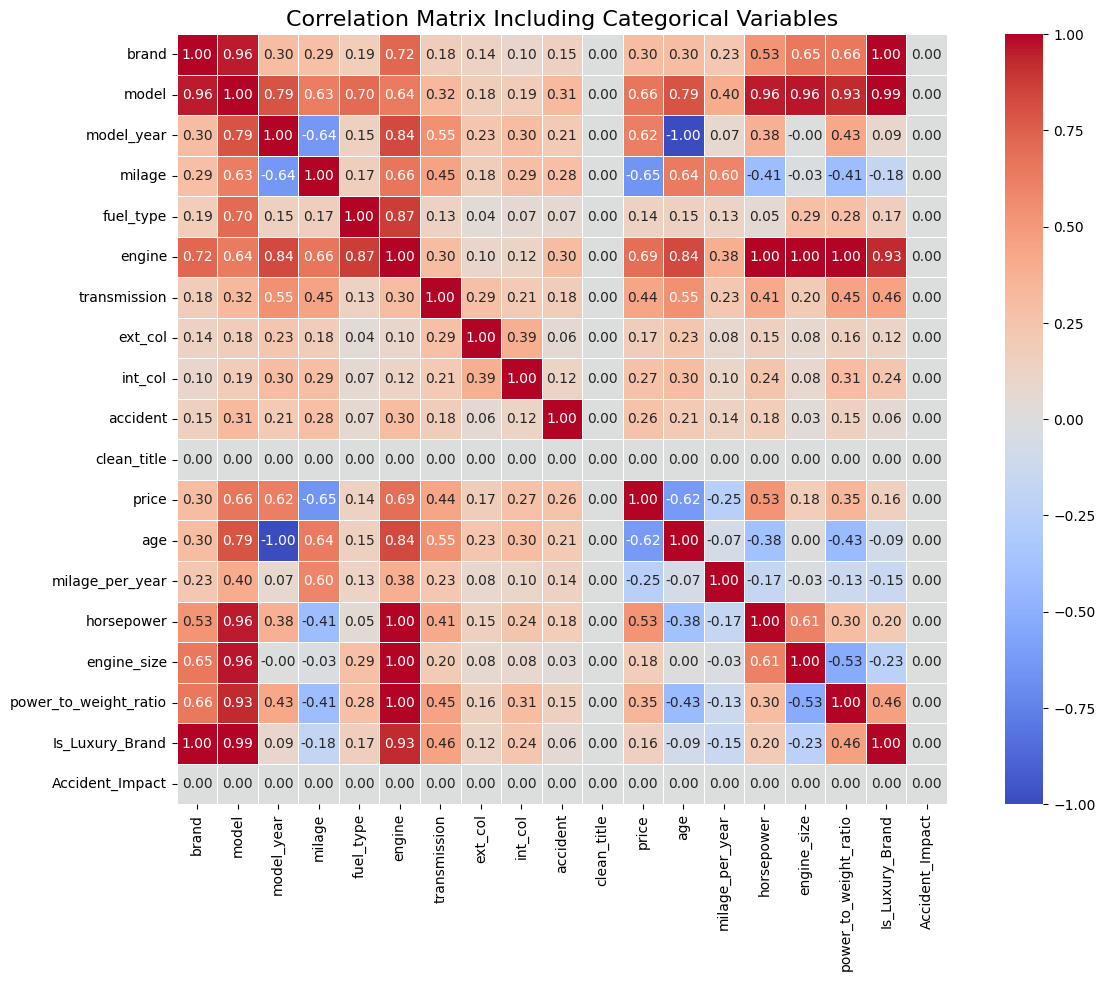

In [12]:
from dython.nominal import associations
import seaborn as sns

# matriz de correlacion incluyendo variables categoricas
def matriz_correlacion_categoricas(df):
    associations_df = associations(df_clean, nominal_columns=categorical_columns, plot=False)
    corr_matrix = associations_df['corr']
    plt.figure(figsize=(15, 10))
    plt.title('Correlation Matrix Including Categorical Variables', fontsize=16)
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5)
    plt.show()

matriz_correlacion_categoricas(df_clean)

## Lasso model training


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

X = df_clean.drop(columns=['price'])
y = df_clean['price']

cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['number']).columns

#First we need to encode categorical columns so the model can be trained
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', RobustScaler(), num_cols)# use RobustScaler to reduce the impact of outliers
    ]
)

model = Pipeline(steps=[
    ('prep', preprocess),
    ('reg', Lasso(alpha=0.25, random_state=1, max_iter=2500))
])

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model.fit(train_X, train_y)

val_predictions = model.predict(val_X)
train_predictions = model.predict(train_X)

from IPython.display import display, Markdown

def make_html_table(df, title):
    html = f'<b>{title}</b><br><table><tr>'
    for col in df.columns:
        html += f'<th>{col}</th>'
    html += '</tr>'
    for _, row in df.iterrows():
        html += '<tr>' + ''.join(f'<td>{v}</td>' for v in row) + '</tr>'
    html += '</table>'
    return html

val_df = pd.DataFrame({
    'Validation Prediction': val_predictions[:5],
    'Validation Actual': list(val_y[:5])
})
train_df = pd.DataFrame({
    'Train Prediction': train_predictions[:5],
    'Train Actual': list(train_y[:5])
})

output = []
output.append("<br>" + "="*60)
output.append("LASSO RESULTS")
output.append("="*60)
output.append(make_html_table(val_df, "Validation Set (Top 5)"))
output.append(make_html_table(train_df, "Training Set (Top 5)"))
output.append("-"*60)
val_mae = mean_absolute_error(val_y, val_predictions)
train_mae = mean_absolute_error(train_y, train_predictions)
val_rmse = root_mean_squared_error(val_y, val_predictions)
train_rmse = root_mean_squared_error(train_y, train_predictions)
val_r2 = r2_score(val_y, val_predictions)
train_r2 = r2_score(train_y, train_predictions)
output.append(f"Validation MAE: {val_mae:.2f}")
output.append("<br>")
output.append(f"Validation RMSE: {val_rmse:.2f}")
output.append("<br>")
output.append(f"Training MAE: {train_mae:.2f}")
output.append("<br>")
output.append(f"Training RMSE: {train_rmse:.2f}")
output.append("<br>")
output.append(f"Validation R2: {val_r2:.3f}")
output.append("<br>")
output.append(f"Training R2: {train_r2:.3f}")
display(Markdown('  \n'.join(output)))

<br>============================================================  
LASSO RESULTS  
============================================================  
<b>Validation Set (Top 5)</b><br><table><tr><th>Validation Prediction</th><th>Validation Actual</th></tr><tr><td>22586.291464582853</td><td>24000.0</td></tr><tr><td>26728.49749829581</td><td>21495.0</td></tr><tr><td>57590.89654650958</td><td>62000.0</td></tr><tr><td>54269.42263689604</td><td>68000.0</td></tr><tr><td>32145.024277651817</td><td>29999.0</td></tr></table>  
<b>Training Set (Top 5)</b><br><table><tr><th>Train Prediction</th><th>Train Actual</th></tr><tr><td>47001.33121993291</td><td>37500.0</td></tr><tr><td>15066.251938921825</td><td>13000.0</td></tr><tr><td>35488.9410671747</td><td>27450.0</td></tr><tr><td>38502.46397321859</td><td>36995.0</td></tr><tr><td>24739.515143875342</td><td>26000.0</td></tr></table>  
------------------------------------------------------------  
Validation MAE: 9549.77  
<br>  
Validation RMSE: 13239.16  
<br>  
Training MAE: 9336.99  
<br>  
Training RMSE: 12968.55  
<br>  
Validation R2: 0.618  
<br>  
Training R2: 0.629

## Train model with whole dataset and create csv file with predictions to feed it into the frontend

In [14]:
# Train model on the entire df_clean and generate predictions for the frontend
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

# Prepare features and target
X_full = df_clean.drop(columns=['price'])
y_full = df_clean['price']

cat_cols = X_full.select_dtypes(include=['object']).columns
num_cols = X_full.select_dtypes(include=['number']).columns

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
], remainder='drop')

model = Pipeline([
    ('prep', preprocess),
    ('reg', Lasso(alpha=0.25, random_state=1, max_iter=2500))
])

model.fit(X_full, y_full)

# Predict prices for the whole dataset
predicted_prices = model.predict(X_full)

# Create a new DataFrame with all features and predicted price
df_pred = X_full.copy()
df_pred['predicted_price'] = predicted_prices

# Save to CSV for frontend use
df_pred.to_csv('../datasets/predicted_prices_for_frontend.csv', index=False)
df_pred.head()

c:\Users\raquel\Desktop\ai-project-Regression_equipo4\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+13, tolerance: 6.328e+09
  model = cd_fast.sparse_enet_coordinate_descent(


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,age,milage_per_year,horsepower,engine_size,power_to_weight_ratio,Is_Luxury_Brand,Accident_Impact,predicted_price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,18,11833.333333,172.0,1.6,107.500000,0,0,-2200.095029
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,23,6228.260870,252.0,3.9,64.615385,0,0,344.875137
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,23,5944.826087,320.0,5.3,60.377358,0,0,6577.846765
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,8,2437.500000,420.0,5.0,84.000000,0,0,45020.284519
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,4,1847.000000,208.0,2.0,104.000000,1,0,51704.520550


## Getting coefficients assigned by Lasso model to each feature

In [ ]:
# 'model' es el Pipeline: ('prep', ColumnTransformer(...)), ('reg', Lasso(...))
preproc = model.named_steps['prep']
lasso = model.named_steps['reg']

# columnas origen (definidas en el notebook)
# cat_cols = X.select_dtypes(include=['object']).columns
# num_cols = X.select_dtypes(include=['number']).columns

# obtener nombres generados por OneHotEncoder
ohe = preproc.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(cat_cols)  # requiere sklearn>=1.0

# columnas numéricas (passthrough/Scaled)
num_feature_names = list(num_cols)

# combinar nombres
feature_names = np.concatenate([ohe_feature_names, num_feature_names])

# coeficientes del modelo Lasso
coefs = lasso.coef_

coef_series = pd.Series(coefs, index=feature_names).sort_values(key=abs, ascending=False)

# Mostrar top 20 por magnitud
coef_series.head(20)

model_911 Carrera 4 Cabriolet                           21260.688466
model_RDX w/A-Spec Package                              19879.213899
model_Niro EX                                           18965.811188
engine_405.0HP 3.0L V6 Cylinder Engine Gasoline Fuel    17761.078793
model_RX 350 F SPORT Appearance                         17720.416089
                                                            ...     
engine_495.0HP 5.0L 8 Cylinder Engine Gasoline Fuel      6069.373399
engine_412.0HP 5.0L 8 Cylinder Engine Gasoline Fuel     -6061.978418
engine_624.0HP 6.6L 12 Cylinder Engine Gasoline Fuel     6058.472281
model_Suburban 2500 LS                                   6027.099540
model_Romeo Giulia Ti                                    6019.812565
Length: 200, dtype: float64